In [1]:
from mitochnodria import *
from helpersGeneration import *


%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Edge(start=(100.0, 0.0), end=(100.0, 200.0), length=200.00, angle=90.00°)


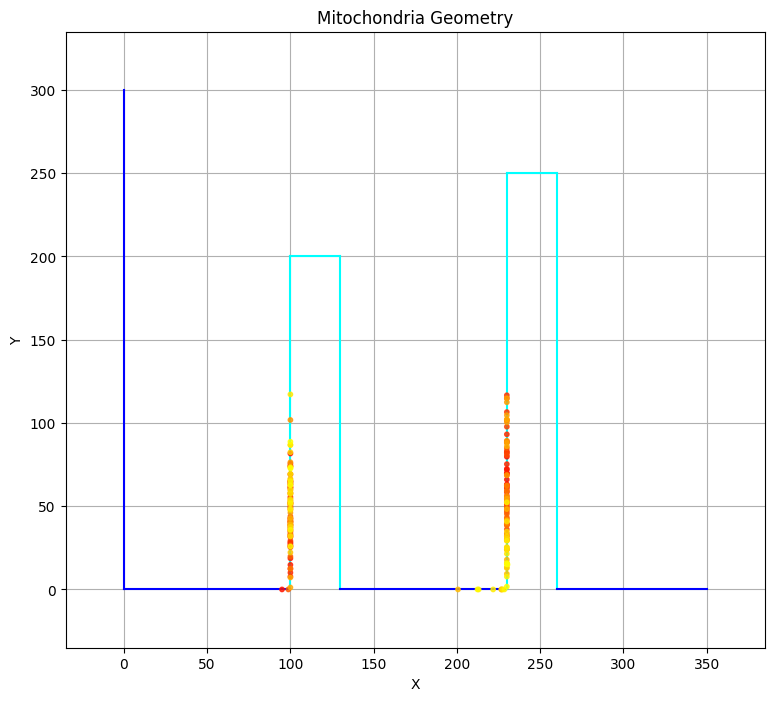

In [2]:

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


# Tests on standard settings:
T = 500
D = 50
alpha = 1
deltaT = 0.01
# number of subposition per Frame for image Generation
nPosFrame = 10




# Create some edges for a simple mitochondria shape
edges = [
    Edge((0, 300), (0, 0)),
    Edge((0, 0), (100, 0)),
    Edge((100, 0), (100, 200), color='cyan'),
    Edge((100, 200), (130, 200), color='cyan'),
    Edge((130, 200), (130, 0), color='cyan'),
    Edge((130, 0), (230, 0)),
    Edge((230, 0), (230, 250), color='cyan'),
    Edge((230, 250), (260, 250), color='cyan'),
    Edge((260, 250), (260, 0), color='cyan'),
    Edge((260, 0), (350, 0)),
]

# Create the geometry
mito = Geometry(edges)

print(mito.get_edge_at_position([100,50]))


# Map displacements to 2D positions
# Diffusion coefficient: D=0.025 um2 s-1; Anomalous coefficient α=0.5
displacements = disp_fbm(0.5, 25000,100, 0.01)
#print(displacements)
initial_distance = 400.0  # Start at beginning of geometry
positions = mito.map_displacements(displacements, initial_distance)
#print(positions)
# Draw the geometry
fig, ax = plt.subplots(figsize=(10, 8))
mito.draw(ax)

draw_trajectory(positions, ax)

# Map displacements to 2D positions
# Diffusion coefficient: D=0.025 um2 s-1; Anomalous coefficient α=0.5
displacements = disp_fbm(0.5, 25000/100,100, 1)
#print(displacements)
initial_distance = 1000.0  # Start at beginning of geometry
positions = mito.map_displacements(displacements, initial_distance)
draw_trajectory(positions, ax)

plt.grid(True)
plt.show()



8220.0


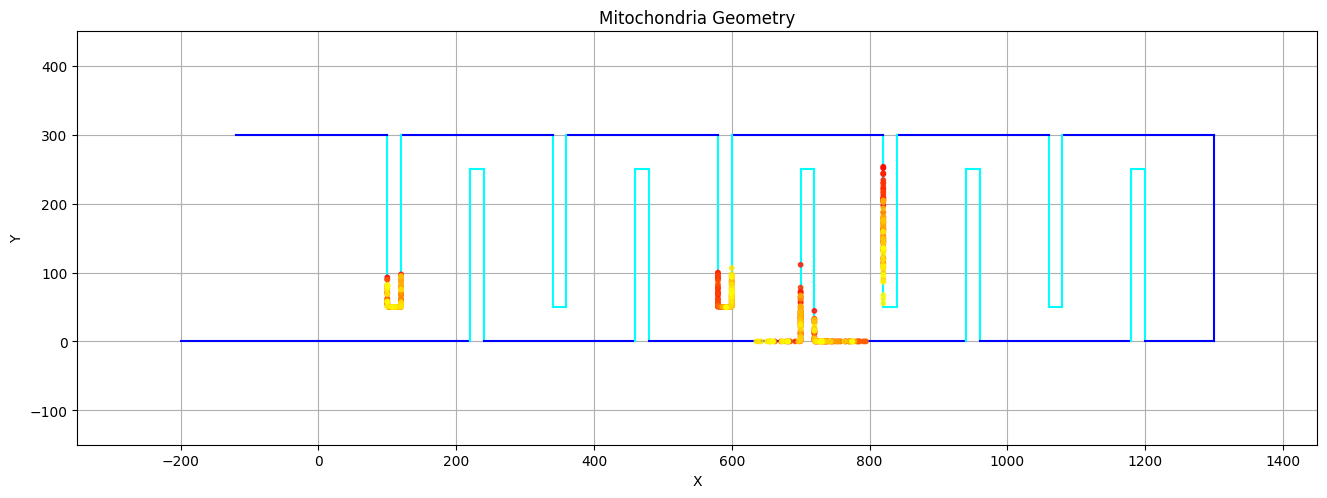

In [3]:
# creation of a complex mitochondria shape: 

def add_edge(x,y, disp_x, disp_y, edges, color='blue'):
    new_x, new_y = x + disp_x, y + disp_y 
    edges.append(Edge((x, y), (new_x, new_y), color=color))
    return new_x, new_y

# c stands for crista
c_width, c_length, c_intercrista = 20,250,100
c_nbr = 5

# m stands for mitochondria
m_height = 300

start_x, start_y = 0,0

edges = [
    Edge((-200, start_y), (start_x, start_y), color='blue')
]
x,y  = start_x, start_y
for i in range(c_nbr):

    # Add cirsta going to the right by:
    #   add insterspace
    x,y  = add_edge(x,y, 2*c_intercrista + c_width, 0, edges, 'blue')
    #   add cirsta
    x,y  = add_edge(x,y, 0, c_length, edges, 'cyan')
    x,y  = add_edge(x,y, c_width, 0, edges, 'cyan')
    x,y  = add_edge(x,y, 0, -c_length, edges, 'cyan')
    #

x,y = add_edge(x,y,c_intercrista,0,edges,'blue')
x,y = add_edge(x,y,0,m_height,edges,'blue')
x,y = add_edge(x,y,-(2*c_intercrista + c_width),0,edges,'blue')

for i in range(c_nbr):

    # Add cirsta going to the right by:
    #   add cirsta
    x,y  = add_edge(x,y, 0, -c_length, edges, 'cyan')
    x,y  = add_edge(x,y, -c_width, 0, edges, 'cyan')
    x,y  = add_edge(x,y, 0, +c_length, edges, 'cyan')

    #   add insterspace
    x,y  = add_edge(x,y, -(2*c_intercrista + c_width), 0, edges, 'blue')


mito = Geometry(edges)

print(mito.total_length)
fig, ax = plt.subplots(figsize=(16, 12))
mito.draw(ax)



for i in range(5):
    # Map displacements to 2D positions
    # Diffusion coefficient: D=0.025 um2 s-1; Anomalous coefficient α=0.5
    displacements = disp_fbm(0.5, 25000/100,100, 1)
    #print(displacements)
    initial_distance = np.random.randint(200, mito.total_length-200)  # Start at beginning of geometry
    positions = mito.map_displacements(displacements, initial_distance)
    draw_trajectory(positions, ax)


plt.grid(True)
plt.show()


52.81857750083675 0.2645880550313518 -51.865572144809484
6.347632216792074 2.7903668013847223 0.0
2.5 2.3419401222669616 1.6753326450314034
(100, 2, 2)


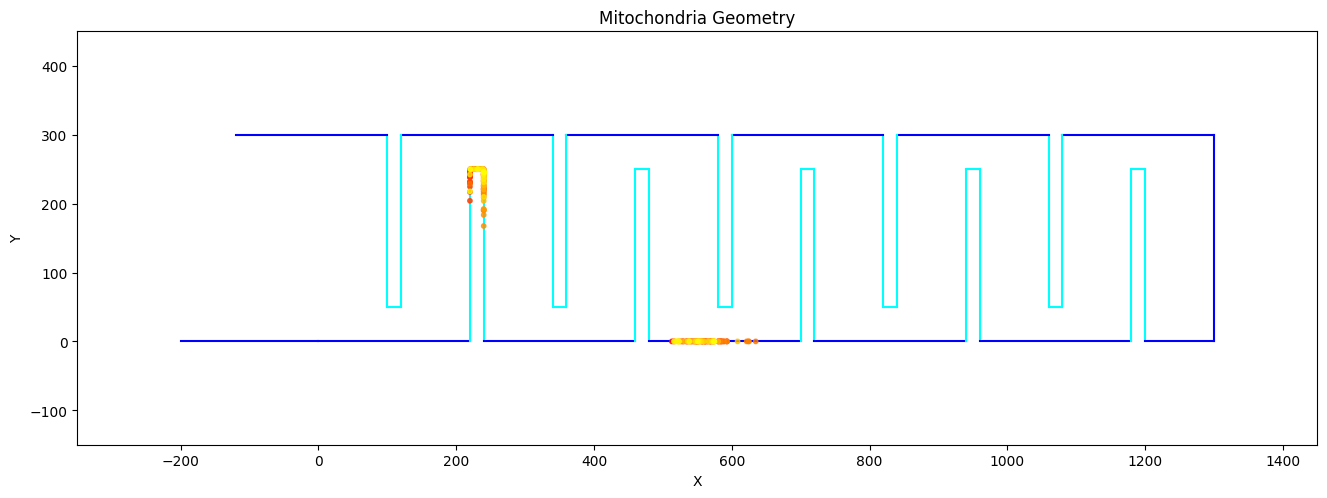

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


vmin: 7348.0 vmax: 10323.0 mean: 7745.21


In [22]:
from andi_datasets.utils_videos import transform_to_video
from andi_datasets.utils_trajectories import motion_blur

T = 100
pixel_size = 100


oversamp_factor = 10
nposframe = oversamp_factor
output_length = T//oversamp_factor
exposure_time = 0.2

MB = motion_blur(output_length = output_length, oversamp_factor = oversamp_factor, exposure_time = exposure_time)
fig, ax = plt.subplots(figsize=(16, 12))
mito.draw(ax)
# Map displacements to 2D positions
# Diffusion coefficient: D=0.025 um2 s-1; Anomalous coefficient α=0.5
displacements = disp_fbm(0.5, 25000,T, 0.01)
print(np.max(displacements), np.mean(displacements), np.min(displacements))
#print(displacements)
initial_distance = np.random.randint(200, mito.total_length-200)  # Start at beginning of geometry
#initial_distance = 400  # Start at beginning of geometry
positions1 = mito.map_displacements(displacements, initial_distance) 
draw_trajectory(positions1, ax)
positions1 /= pixel_size

displacements = disp_fbm(0.5, 25000,T, 0.01) 
#print(displacements)
initial_distance = np.random.randint(200, mito.total_length-200)  # Start at beginning of geometry
#initial_distance = 400  # Start at beginning of geometry
positions2 = mito.map_displacements(displacements, initial_distance) 
draw_trajectory(positions2, ax)
positions2 /= pixel_size

print(np.max(positions1), np.mean(positions1), np.min(positions1))
print(np.max(positions2), np.mean(positions2), np.min(positions2))


x= np.concatenate([np.expand_dims(positions1, axis=1), np.expand_dims(positions2, axis=1)], axis=1)
print(x.shape)



plt.show()

im_size = 16

vid = transform_to_video(x,
    motion_blur_generator=MB,
    optics_props={ "output_region": [0, 0, 2*im_size, 2*im_size], #'resolution' : pixel_size * 130e-9
                  },
    
    particle_props = {
        "particle_intensity": [
            500,
            20,
        ]
    },

)

play_video(vid)